In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from urllib.request import urlopen 
from bs4 import BeautifulSoup 
import time

from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows인 경우
# plt.rcParams['font.family'] = 'AppleGothic'  # MacOS인 경우

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

import math 
from scipy.stats import logistic
from scipy.stats import trim_mean
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans

from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam


In [5]:
data=[1,2,3,4,5]
np.std(data)

1.4142135623730951

In [9]:
box=[1,2,10]
rep=1000 # the nummber of repetitions
n=10   # 추출횟수 
np.random.seed(1234)

sum_of_cards=[]

for _ in range(rep):
    x_sum=np.random.choice(box, size=n, replace=True)
    x_sum1=np.sum(x_sum)
    sum_of_cards.append(x_sum1)

print(sum_of_cards)

[41, 47, 57, 49, 31, 17, 47, 59, 65, 42, 33, 42, 29, 48, 50, 23, 33, 33, 30, 43, 57, 41, 32, 33, 30, 33, 42, 25, 50, 57, 56, 38, 32, 42, 41, 40, 41, 56, 68, 49, 50, 67, 58, 49, 48, 58, 44, 33, 33, 25, 39, 31, 25, 57, 50, 42, 31, 32, 35, 40, 50, 67, 44, 23, 50, 33, 56, 32, 40, 57, 48, 49, 57, 49, 42, 34, 49, 32, 41, 49, 58, 43, 42, 52, 30, 41, 73, 39, 50, 19, 39, 66, 32, 57, 56, 56, 39, 47, 33, 40, 58, 34, 41, 49, 35, 50, 32, 24, 57, 49, 59, 41, 24, 42, 56, 32, 42, 49, 57, 56, 33, 32, 49, 23, 58, 41, 30, 51, 42, 42, 47, 57, 64, 40, 49, 47, 51, 32, 33, 32, 48, 22, 46, 23, 32, 18, 40, 15, 34, 49, 58, 38, 51, 25, 41, 51, 55, 67, 31, 31, 64, 44, 58, 49, 39, 34, 48, 24, 48, 37, 34, 51, 50, 40, 31, 24, 50, 25, 41, 24, 25, 22, 57, 40, 42, 56, 31, 67, 51, 48, 32, 40, 39, 41, 56, 58, 50, 30, 32, 75, 48, 41, 42, 41, 40, 32, 33, 41, 49, 59, 31, 24, 39, 31, 49, 13, 49, 41, 40, 24, 38, 52, 23, 31, 25, 30, 58, 49, 39, 49, 58, 41, 23, 58, 14, 49, 57, 58, 32, 83, 75, 56, 21, 30, 65, 32, 50, 57, 58, 32,

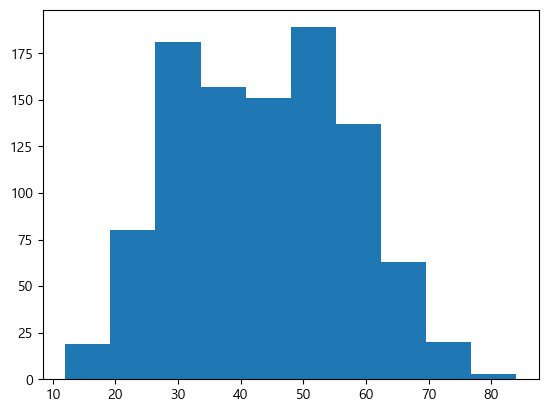

In [13]:
plt.hist(sum_of_cards, bins=10)
plt.show()

In [15]:
box=[1,2,10]
rep=1000 # the nummber of repetitions
n=100  # 추출횟수 
np.random.seed(1234)

sum_of_cards=[]

for _ in range(rep):
    x_sum=np.random.choice(box, size=n, replace=True)
    x_sum1=np.sum(x_sum)
    sum_of_cards.append(x_sum1)

print(sum_of_cards)

[455, 364, 400, 463, 465, 382, 452, 450, 447, 465, 429, 458, 401, 452, 327, 448, 445, 370, 439, 453, 426, 341, 394, 473, 476, 369, 431, 423, 417, 384, 436, 433, 396, 488, 459, 381, 463, 389, 458, 440, 430, 422, 519, 392, 429, 466, 436, 460, 321, 461, 391, 468, 466, 465, 492, 401, 399, 415, 454, 544, 503, 383, 400, 450, 453, 564, 414, 432, 501, 472, 450, 412, 442, 329, 434, 453, 429, 491, 485, 463, 434, 484, 391, 461, 424, 473, 458, 394, 451, 418, 462, 421, 369, 399, 403, 469, 431, 438, 467, 402, 417, 466, 480, 413, 440, 487, 425, 369, 439, 446, 382, 445, 412, 427, 418, 383, 442, 443, 457, 423, 497, 401, 373, 469, 382, 429, 387, 499, 412, 475, 423, 469, 377, 429, 440, 415, 445, 396, 485, 411, 407, 413, 452, 418, 470, 507, 427, 496, 495, 465, 429, 408, 433, 422, 504, 457, 483, 382, 502, 373, 389, 508, 439, 416, 433, 392, 456, 435, 414, 424, 340, 423, 412, 382, 448, 504, 452, 426, 358, 525, 397, 425, 456, 426, 408, 467, 405, 438, 410, 404, 503, 361, 491, 431, 396, 466, 440, 540, 438, 445,

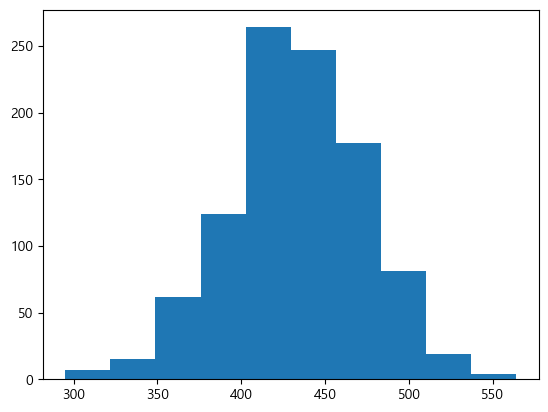

In [17]:
plt.hist(sum_of_cards, bins=10)
plt.show()

In [19]:
box=[1,2,10]
rep=1000 # the nummber of repetitions
n=1000  # 추출횟수 
np.random.seed(1234)

sum_of_cards=[]

for _ in range(rep):
    x_sum=np.random.choice(box, size=n, replace=True)
    x_sum1=np.sum(x_sum)
    sum_of_cards.append(x_sum1)

print(sum_of_cards)

[4343, 4222, 4134, 4343, 4336, 4495, 4572, 4388, 4388, 4261, 4382, 4232, 4324, 4290, 4550, 4393, 4306, 4270, 4236, 4511, 4539, 4196, 4227, 4327, 4306, 4304, 4416, 4360, 4274, 4369, 4341, 4333, 4366, 4517, 4180, 4366, 4295, 4228, 4206, 4547, 4275, 4266, 4367, 4463, 4300, 4292, 4166, 4322, 4172, 4429, 4351, 4272, 4292, 4422, 4006, 4215, 4510, 4287, 4440, 4482, 4232, 4516, 4286, 4204, 4094, 4421, 4114, 4187, 4146, 4543, 4236, 4182, 4060, 4353, 4659, 4192, 4299, 4370, 4439, 4077, 4328, 4293, 4427, 4262, 4337, 4329, 4307, 4294, 4324, 4285, 4367, 4353, 4481, 4319, 4214, 4531, 4243, 4273, 4291, 4440, 4250, 4682, 4376, 4089, 4272, 4396, 4305, 4132, 4283, 4388, 4333, 4501, 4117, 4335, 4279, 4651, 4219, 4361, 4244, 4473, 4341, 4304, 4154, 4405, 4314, 4380, 4224, 4315, 4424, 4153, 4256, 4232, 4415, 4330, 4492, 4380, 4227, 4144, 4479, 4390, 4481, 4310, 4170, 4405, 4321, 4150, 4270, 4348, 4067, 4283, 4340, 4343, 4183, 4355, 4201, 4413, 4198, 4362, 4448, 4276, 4429, 4490, 4465, 4098, 4592, 4276, 437

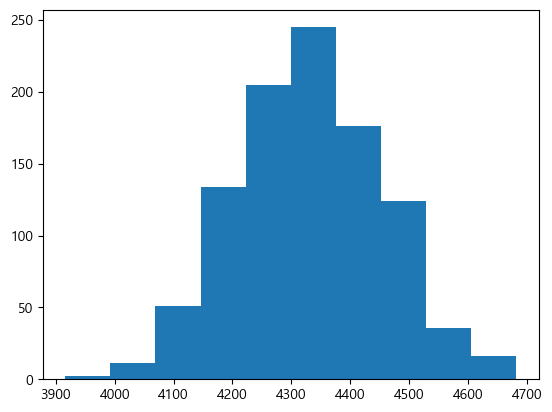

In [21]:
plt.hist(sum_of_cards, bins=10)
plt.show()

In [23]:
np.mean(box)

4.333333333333333

In [25]:
np.std(box)

4.0276819911981905

In [27]:
np.sqrt(10)*4.02

12.712356193876884

In [33]:
from scipy.stats import norm 
# 카드를 10장을 뽑는 경우 
x=np.linspace(10, 90, 1000)
y=norm.pdf(x, 43.3, 12.712) 

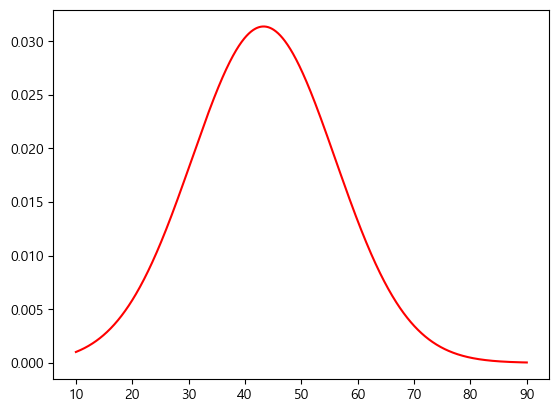

In [35]:
plt.plot(x,y, color='red')
plt.show()